### Simulation

In [28]:
from bmc.simulate import simulate
import numpy as np
import matplotlib.pyplot as plt

In [29]:
low = -20e-6
high = 20e-6 
n_iso = 1000
mean = (low + high) / 2
std_dev = (high - low) / 6 

# z_pos = np.random.normal(loc=mean, scale=std_dev, size=n_iso)
z_pos = np.linspace(low, high, n_iso)
z_pos = np.append(z_pos, 0)
z_pos = np.clip(z_pos, low, high)
z_pos = np.sort(z_pos)

# plt.plot(z_pos, 'o')

np.where(z_pos == 0)[0][0]


500

In [30]:
seq_path_gauss = 'seq_lib/1_ETM.seq'
config_path = 'sim_lib/config_1pool.yaml'

adc_time = 6e-3
retun_zmag = False
show_plot = False
write_all_mag = True
webhook = False
plt_range = [0, 4]
iso_select = [-5,0,5]

In [31]:
sim = simulate(config_file=config_path, 
                   seq_file=seq_path_gauss, 
                   adc_time=adc_time,
                   z_positions=z_pos,
                   return_zmag=retun_zmag,
                   iso_select=iso_select,
                   show_plot=show_plot,
                   write_all_mag=write_all_mag,
                   webhook=webhook,
                   plt_range=plt_range)  # simulation mac

BMCTool simulation: 100%|██████████| 33/33 [00:46<00:00,  1.42s/it]

['rf at 0.0000s', 'delay at 0.0020s', 'gz at 0.0025s', 'delay at 0.0030s', 'rf at 0.0035s', 'gz at 0.0055s', 'rf at 0.0135s', 'delay at 0.0155s', 'gz at 0.0160s', 'delay at 0.0165s', 'rf at 0.0170s', 'gz at 0.0190s', 'rf at 0.0270s', 'delay at 0.0290s', 'gz at 0.0295s', 'delay at 0.0300s', 'rf at 0.0305s', 'gz at 0.0325s', 'rf at 0.0405s', 'delay at 0.0425s', 'gz at 0.0430s', 'delay at 0.0435s', 'rf at 0.0440s', 'gz at 0.0460s', 'rf at 0.0540s', 'delay at 0.0560s', 'gz at 0.0565s', 'delay at 0.0570s', 'rf at 0.0575s', 'gz at 0.0595s', 'rf at 0.0675s', 'gz at 0.0695s', 'adc at 0.0700s']
[]


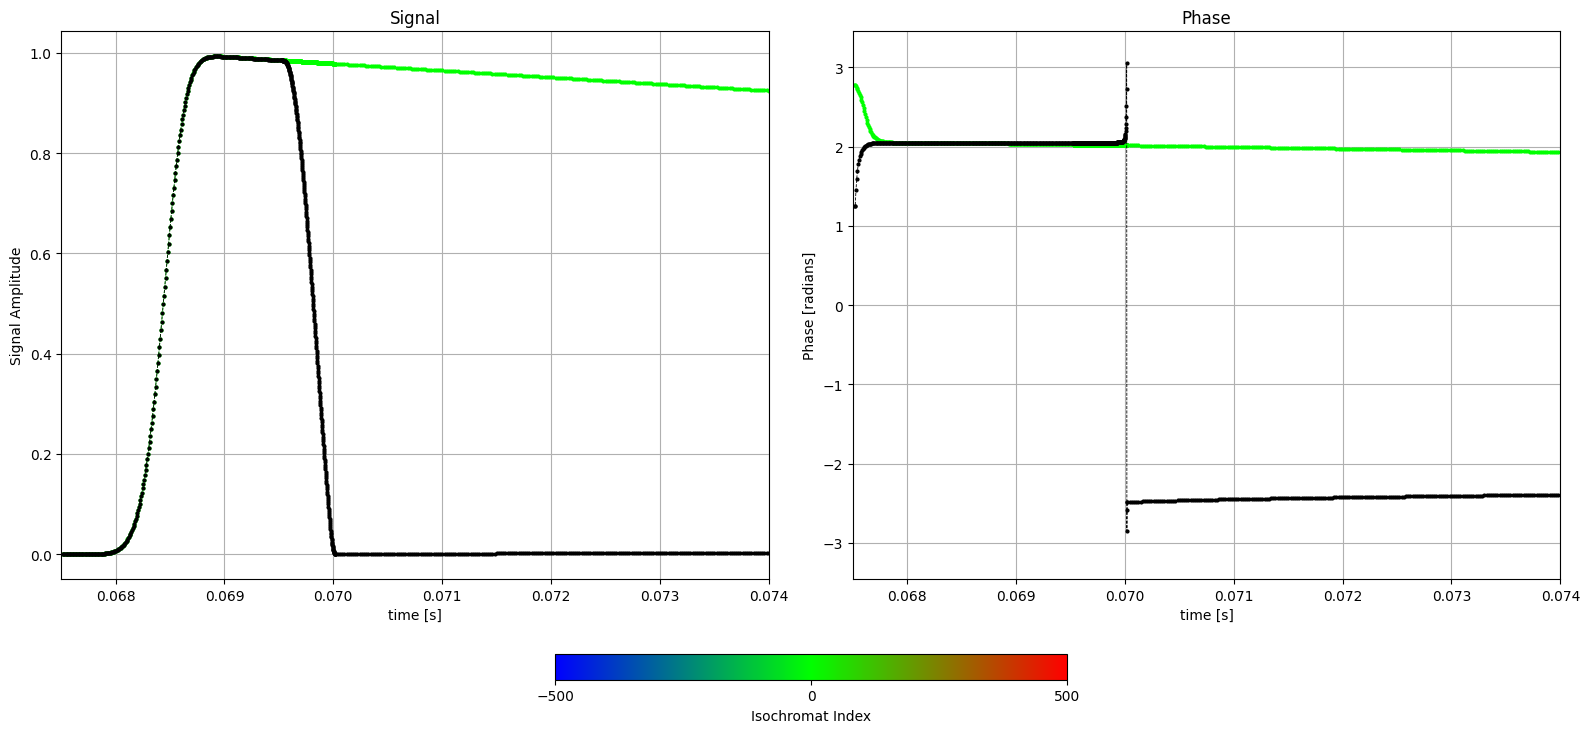

In [32]:
from bmc.utils.eval import plot_sim
time, m_z, m_z_total, m_c, m_c_total = sim.get_mag(return_cest_pool=False)

iso_select = [0]
plt_range = [0.0, 0.0353] #1ETM
plt_range = [0.0675, 0.074] #5ETM
# plt_range = [0.1250, 0.141] #10ETM
# plt_range = [0.0675, 0.09]
# plt_range = [0.8275, 1.048]

# _ = plot_sim(m_out=[m_z, m_z_total], time=time, plt_range=plt_range, iso_select=iso_select)
_ = plot_sim(m_out=[m_c, m_c_total], time=time, plt_range=plt_range, iso_select=iso_select)

m_trans_plus = np.abs(m_c_total)[-900:]
m_z_plus = m_z_total



### Animation

In [33]:
run_time = .1
track_path = True
ie = True
timing = False
total_mag = True
animate_cest = True
kwargs = {'quality': '-pql', 'write': ''}  #--write_to_movie

In [34]:
# sim.animate(run_time=run_time, 
#             track_path=track_path, 
#             ie=ie, 
#             timing=timing,
#             total_mag=total_mag,
#             animate_cest=animate_cest,
#             **kwargs)

In [35]:
seq_path_gauss = 'seq_lib/1_ETM_minus.seq'
config_path = 'sim_lib/config_1pool.yaml'

adc_time = 6e-3
retun_zmag = False
show_plot = False
write_all_mag = True
webhook = False
plt_range = [0, 4]
iso_select = [-5,0,5]

In [36]:
sim_minus = simulate(config_file=config_path, 
                   seq_file=seq_path_gauss, 
                   adc_time=adc_time,
                   z_positions=z_pos,
                   return_zmag=retun_zmag,
                   iso_select=iso_select,
                   show_plot=show_plot,
                   write_all_mag=write_all_mag,
                   webhook=webhook,
                   plt_range=plt_range)  # simulation mac

BMCTool simulation: 100%|██████████| 33/33 [00:46<00:00,  1.41s/it]

['rf at 0.0000s', 'delay at 0.0020s', 'gz at 0.0025s', 'delay at 0.0030s', 'rf at 0.0035s', 'gz at 0.0055s', 'rf at 0.0135s', 'delay at 0.0155s', 'gz at 0.0160s', 'delay at 0.0165s', 'rf at 0.0170s', 'gz at 0.0190s', 'rf at 0.0270s', 'delay at 0.0290s', 'gz at 0.0295s', 'delay at 0.0300s', 'rf at 0.0305s', 'gz at 0.0325s', 'rf at 0.0405s', 'delay at 0.0425s', 'gz at 0.0430s', 'delay at 0.0435s', 'rf at 0.0440s', 'gz at 0.0460s', 'rf at 0.0540s', 'delay at 0.0560s', 'gz at 0.0565s', 'delay at 0.0570s', 'rf at 0.0575s', 'gz at 0.0595s', 'rf at 0.0675s', 'gz at 0.0695s', 'adc at 0.0700s']
[]


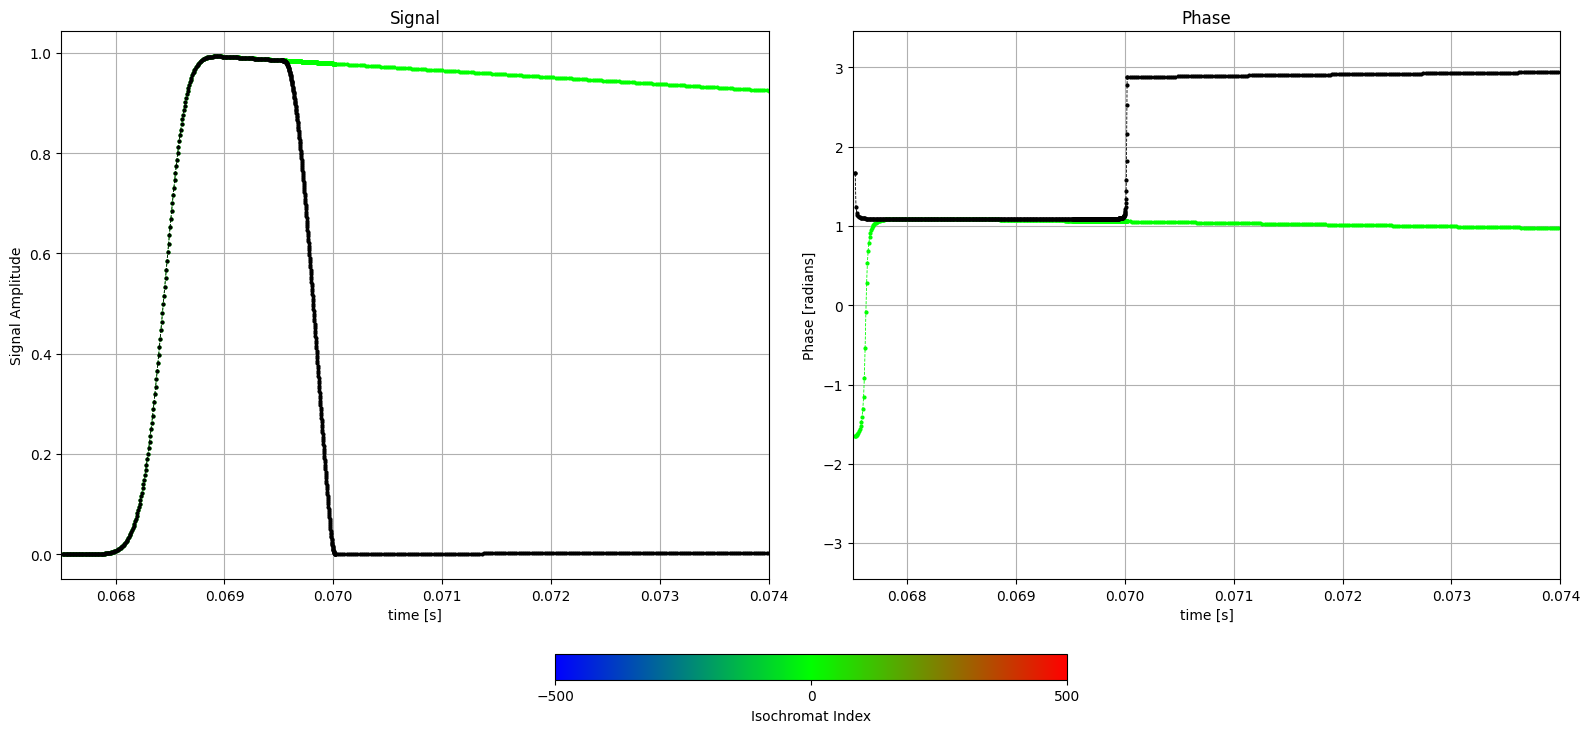

In [37]:
from bmc.utils.eval import plot_sim
time, m_z, m_z_total, m_c, m_c_total = sim_minus.get_mag(return_cest_pool=False)


iso_select = [0]
plt_range = [0.0, 0.0353] #1ETM
plt_range = [0.0675, 0.074] #5ETM
# plt_range = [0.0286, 0.0360]
# plt_range = [0.0675, 0.09]
# plt_range = [0.8275, 1.048] #wex

# _ = plot_sim(m_out=[m_z, m_z_total], time=time, plt_range=plt_range, iso_select=iso_select)
_ = plot_sim(m_out=[m_c, m_c_total], time=time, plt_range=plt_range, iso_select=iso_select)

m_trans_minus = np.abs(m_c_total)[-900:]

In [38]:
x_rf = np.arange(0, 2e-3, 2e-3/300)
x_spoil = np.arange(2e-3,2.5e-3, 0.5e-3/300) #0.5ms spoil
# x_spoil = np.arange(2e-3,3e-3, 1e-3/300) #1ms spoil
# x_adc = np.arange(2.5e-3, 5.5e-3, 3e-3/300) #3ms adc
x_adc = np.arange(2.5e-3, 8.5e-3, 6e-3/300) #200ms adc
# x_adc = np.arange(3e-3, 6e-3, 3e-3/300) #3ms adc


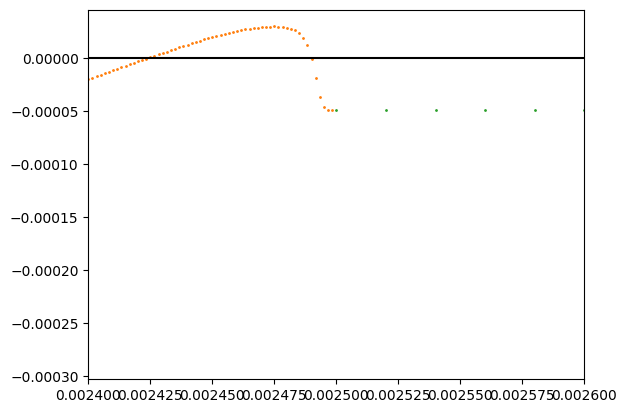

In [41]:
# plt.plot(x_spoil, (np.abs(m_trans_plus)-np.abs(m_trans_minus))[:300])
# plt.plot(x_adc, (np.abs(m_trans_plus)-np.abs(m_trans_minus))[300:])
plt.plot(x_rf,(m_trans_plus-m_trans_minus)[:300], 'o', markersize=1)
plt.plot(x_spoil,(m_trans_plus-m_trans_minus)[300:600], 'o', markersize=1)
plt.plot(x_adc,(m_trans_plus-m_trans_minus)[600:], 'o', markersize=1)
plt.axhline(0, c='black')
# plt.axhline(0.0055)
# plt.axvline(0.002476)

# plt.scatter(0.002476, 0.0055, c='b')

# plt.axhline(0.0295, color='r')
# plt.axvline(0.0025, color='r')

# plt.scatter(0.0025, 0.0295, c='r')

# plt.axhline(0.0003, color='g')
# plt.axvline(0.002482, color='g')

# plt.scatter(0.002475, 0.00026, c='g')

# plt.axhline(0.0141, color='purple')
# plt.axvline(0.002485, color='purple')
# plt.scatter(0.002497, 0.000136, c='purple')

# plt.plot(x_rf,m_trans_plus[:300], 'o', markersize=1, c='b')
# plt.plot(x_spoil,m_trans_plus[300:600], 'o', markersize=1, c='b')
# plt.plot(x_adc,m_trans_plus[600:], 'o', markersize=1, c='b')

# plt.plot(x_rf,m_trans_minus[:300], 'o', markersize=1, c='r')
# plt.plot(x_spoil,m_trans_minus[300:600], 'o', markersize=1, c='r')
# plt.plot(x_adc,m_trans_minus[600:], 'o', markersize=1, c='r')

# plt.axvline(0.002449)

plt.xlim(0.0024, 0.0026)
# plt.xlim(0.002, 0.005)
# plt.ylim(-0.02, 0.032)
# plt.ylim(-0.001, 0.0008)
resulst = (m_trans_plus-m_trans_minus)

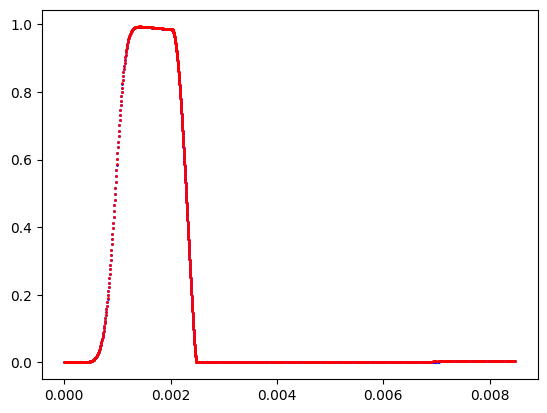

In [40]:
plt.plot(x_rf,m_trans_plus[:300], 'o', markersize=1, c='b')
plt.plot(x_spoil,m_trans_plus[300:600], 'o', markersize=1, c='b')
plt.plot(x_adc,m_trans_plus[600:], 'o', markersize=1, c='b')

plt.plot(x_rf,m_trans_minus[:300], 'o', markersize=1, c='r')
plt.plot(x_spoil,m_trans_minus[300:600], 'o', markersize=1, c='r')
plt.plot(x_adc,m_trans_minus[600:], 'o', markersize=1, c='r')
# plt.axhline(0, c='black')

# plt.xlim(0.0024, 0.0026)
# plt.ylim(0, 0.05)